In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999864,0.999858,0.999708,0.999708,-0.249313
High,0.999864,1.000000,0.999819,0.999868,0.999868,-0.247960
Low,0.999858,0.999819,1.000000,0.999862,0.999862,-0.250610
Close,0.999708,0.999868,0.999862,1.000000,1.000000,-0.249177
Adj Close,0.999708,0.999868,0.999862,1.000000,1.000000,-0.249177
Volume,-0.249313,-0.247960,-0.250610,-0.249177,-0.249177,1.000000


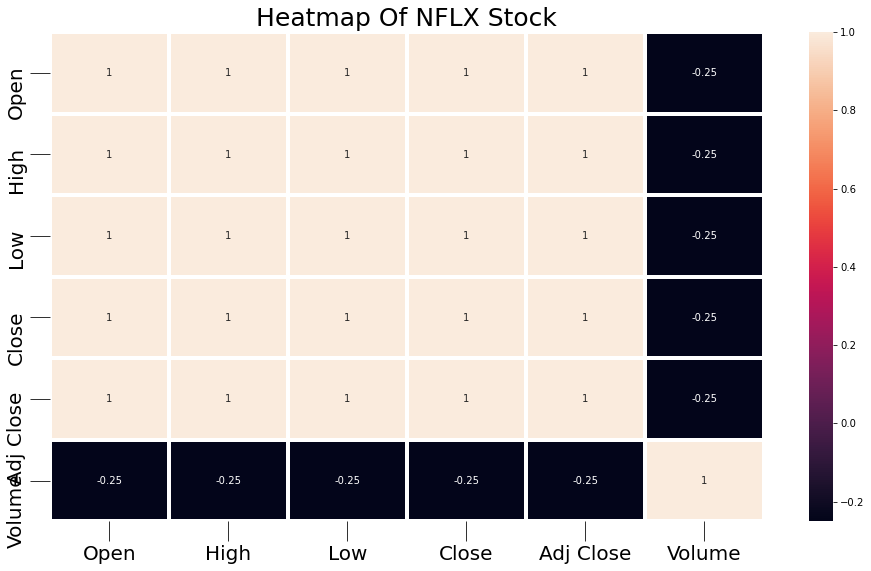

In [6]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(), annot= True, linewidth=3)
ax.tick_params(size=20, labelsize=20)
plt.title("Heatmap Of NFLX Stock",fontsize=25)
plt.show()

Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

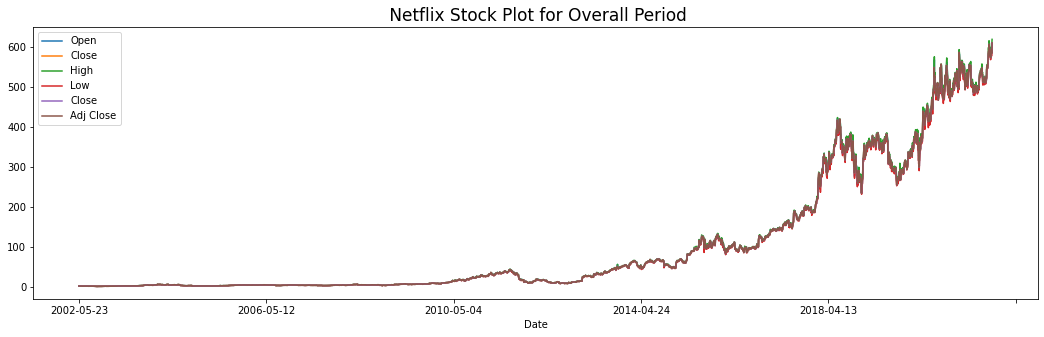

In [7]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

In [8]:
# Top-5 Dates with Highest Stock Price

a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64

In [9]:
#Top-5 Dates with Lowest Stock Price

b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

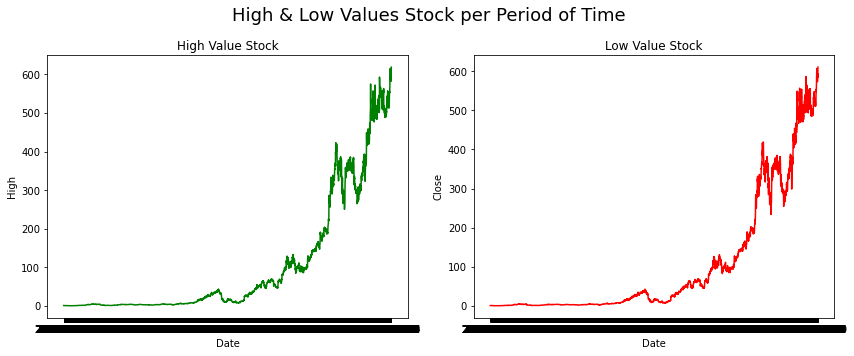

In [10]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

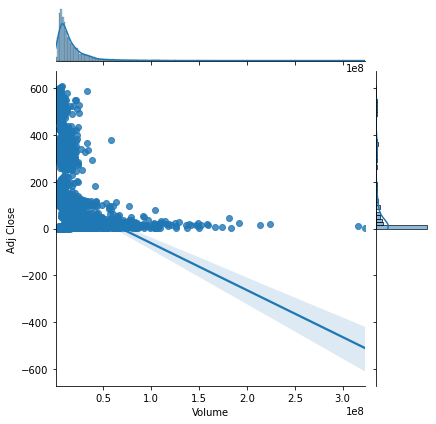

In [11]:
sns.jointplot(x='Volume', y='Adj Close', data=df, kind='reg')

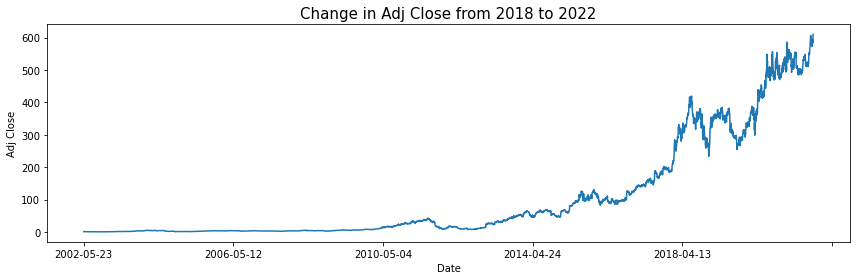

In [12]:
plt.figure(figsize=(12,4))
df['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2018 to 2022',fontsize= 15)
plt.tight_layout()


## Netflix Stock Daily Returns

In [13]:
df['Daily_returns'] = df['Adj Close'].pct_change() #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NaN
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,0.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,-0.043683
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,-0.046297
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,-0.029125


In [14]:
# Best Day of Stock

df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
2013-01-24    0.422235
Name: Daily_returns, dtype: float64

In [15]:
# Worst day of Stock

df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
2004-10-15   -0.409065
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Netflix Stock Daily Returns')

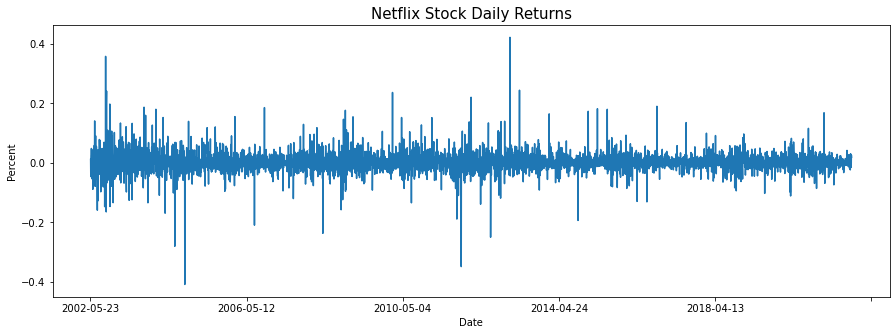

In [16]:
plt.figure(figsize=(15,5))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Daily Returns",fontsize= 15 )

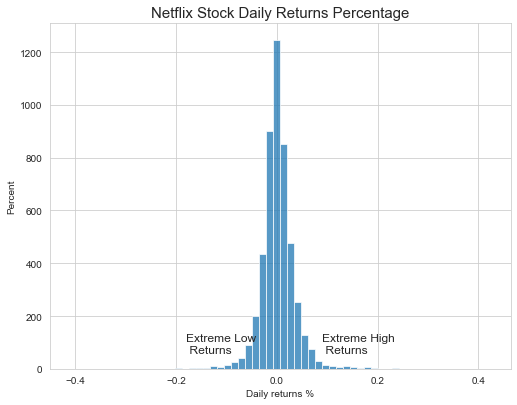

In [17]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()

## Netflix Stock Cumulative Returns

In [18]:
df['Cum_returns']= (df['Daily_returns']+1).cumprod()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NaN,NaN
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,0.011343,1.011343
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,-0.043683,0.967164
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,-0.046297,0.922387
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,-0.029125,0.895522


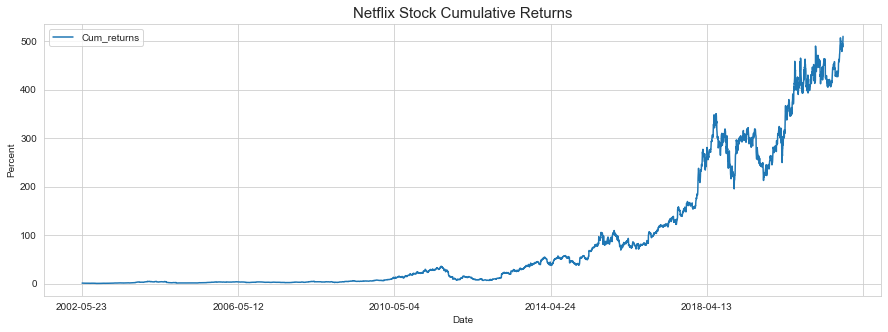

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df['Cum_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Cumulative Returns",fontsize= 15 )
plt.legend()

## Moving Average of Stock

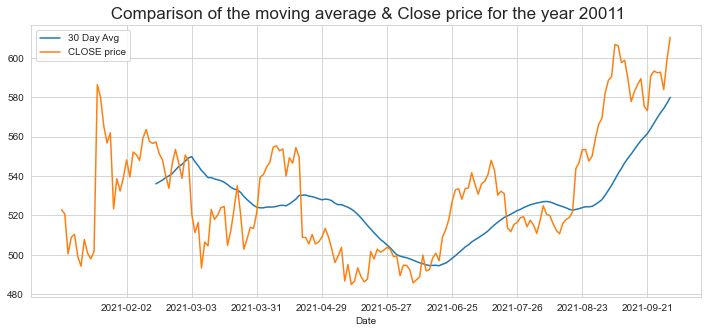

In [20]:
sns.set_style('whitegrid')
f= plt.figure(figsize=(12,5))
df['Close'].loc['2021-01-01': '2021-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].loc['2021-01-01':'2021-12-31'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for the year 20011", fontsize=17)
plt.legend()

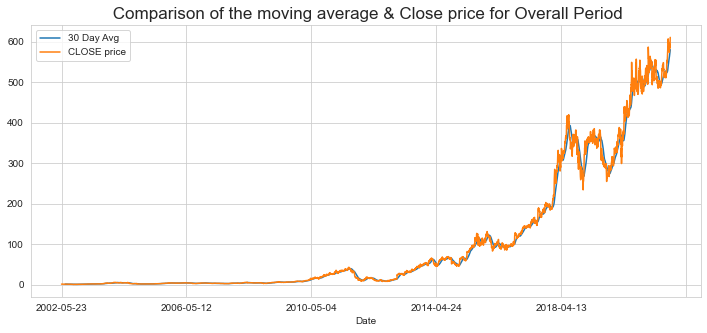

In [21]:
f= plt.figure(figsize=(12,5))
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for Overall Period", fontsize=17)
plt.legend()

In [22]:
df['Mean Avg 30Day'] = df['Close'].rolling(window=30).mean() # MA= mean Average
df['STD 30Day'] = df['Close'].rolling(window=30).std()

In [23]:
df['Upper Band']= df['Mean Avg 30Day'] + (df['STD 30Day'] *2)
df['Lower Band']= df['Mean Avg 30Day'] - (df['STD 30Day'] *2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns,Mean Avg 30Day,STD 30Day,Upper Band,Lower Band
Date,,,,,,,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,0.011343,1.011343,NaN,NaN,NaN,NaN
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,-0.043683,0.967164,NaN,NaN,NaN,NaN
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,-0.046297,0.922387,NaN,NaN,NaN,NaN
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,-0.029125,0.895522,NaN,NaN,NaN,NaN


Text(0.5, 1.0, ' Bollinger Band Plot for Overall Period')

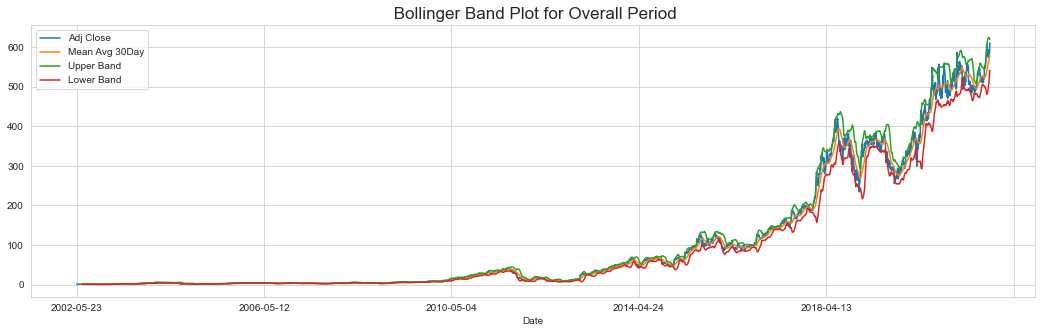

In [24]:
df[['Adj Close', 'Mean Avg 30Day', 'Upper Band', 'Lower Band']].plot(figsize=(18,5))
plt.title(" Bollinger Band Plot for Overall Period", fontsize=17)

## Train & Test Data

In [25]:
X= df[['Open', 'High', 'Low', 'Close', 'Volume']]
y= df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
print("Shape Of X", X.shape)
print("Shape Of y", y.shape)

Shape Of X (4874, 5)
Shape Of y (4874,)


In [27]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51)
print("Shape Of X_train", X_train.shape)
print("Shape Of y_train", y_train.shape)
print("Shape Of X_test", X_test.shape)
print("Shape Of y_test", y_test.shape)

Shape Of X_train (3899, 5)
Shape Of y_train (3899,)
Shape Of X_test (975, 5)
Shape Of y_test (975,)


In [29]:
X_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-07,497.309998,504.820007,490.829987,493.160004,5669900
2005-12-06,3.957143,4.010000,3.944286,3.964286,4062800
2020-11-20,485.220001,494.760010,481.570007,488.239990,4253400
2012-08-13,8.745714,8.750000,8.357143,8.558571,33324900
2020-06-15,421.399994,426.489990,415.420013,425.500000,4467900


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression object with desired hyperparameters
rf = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42)

# Fit the Random Forest Regression model to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

In [31]:
predict = rf.predict(X_test)
print(predict)
print(predict.shape)

[2.23780395e+00 4.28434965e+00 2.91968085e+00 2.64208871e+00
 5.16237840e+02 2.94187988e+02 3.47386728e+01 5.06933589e+01
 5.47764694e+02 1.50279215e+01 6.81701095e+00 7.67901161e+00
 1.45097975e+00 4.07876671e+00 1.52724108e+02 3.15705725e+00
 5.07222873e+01 3.38795111e+00 3.87030054e+01 3.55860135e+02
 2.39798433e+00 1.64294308e+00 5.54280161e+02 9.14750719e-01
 3.10403419e+02 3.70755049e+02 3.56887573e+02 9.59393357e+01
 4.28821581e+01 9.83877063e+01 5.00516607e+02 6.57206684e+00
 2.88560665e+00 3.56066355e+01 5.82716277e+02 1.65815161e+02
 1.57537618e+01 1.02321714e+02 3.12467328e+02 3.94645849e+00
 6.30430695e+00 2.78553101e+00 3.60002394e+02 4.12260464e+00
 8.27343083e+00 1.93220810e+00 2.10147413e+00 7.85896144e-01
 2.49534305e+00 3.41304201e+01 1.17356010e+02 1.80531735e+01
 3.70792248e+02 5.21050134e+00 3.44376612e+01 3.06357716e+00
 3.16849101e+00 4.15268093e+02 2.48755353e+00 3.61965535e+00
 1.80841652e+02 5.17501386e+02 2.85514747e+02 3.15257545e+00
 7.28680749e+00 2.476170

In [32]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {rf.score(X_train, y_train) * 100:.2f}% and Test Score : {rf.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 
mape2 = 100 * np.mean(errors / y_test)
print('MAPE:', mape2)

Mean Absolute Error: 0.1256
Mean Squared Error: 0.1863
Root Mean Squared Error: 0.4316
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.66 %.
MAPE: 0.342409867463272


## Predictions

In [33]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
oneweek_df = pd.DataFrame(predictions[:5])
oneweek_df.to_csv("one-week-predictions.csv")

In [34]:
print(predictions)

            Predictions
2021-09-30     2.237804
2021-10-01     4.284350
2021-10-02     2.919681
2021-10-03     2.642089
2021-10-04   516.237840
...                 ...
2024-05-27     9.206255
2024-05-28    35.274834
2024-05-29    62.084213
2024-05-30    38.534215
2024-05-31     2.993594

[975 rows x 1 columns]


Buy Date and Price of Stock
     Unnamed: 0  Predictions
141  2022-02-18     0.689324 

Sell Date and Price of stock
     Unnamed: 0  Predictions
230  2022-05-18   589.100587


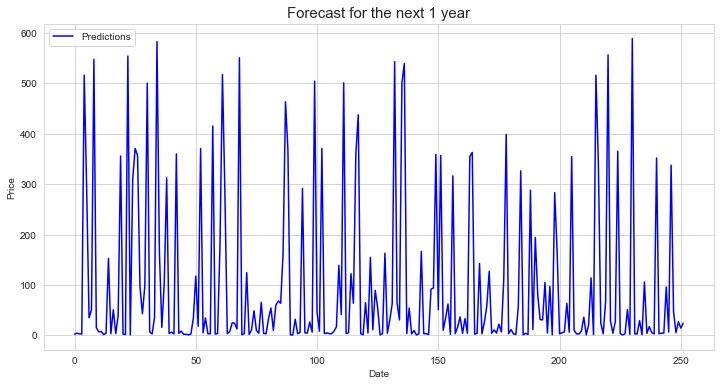

In [35]:
# One Year Prediction

oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(12, 6), color="blue")
plt.title("Forecast for the next 1 year", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
    Unnamed: 0  Predictions
12  2021-10-12      1.45098 

Sell price and date
   Unnamed: 0  Predictions
8  2021-10-08   547.764694


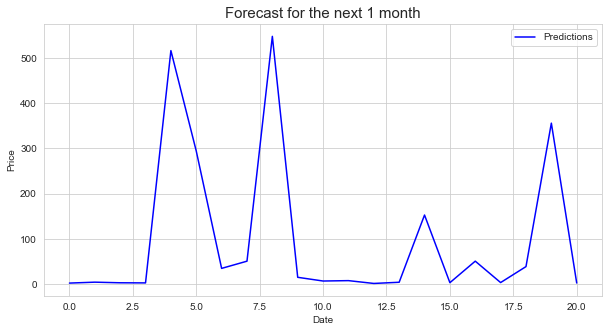

In [36]:
# One Month Prediction

onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 1 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
   Unnamed: 0  Predictions
0  2021-09-30     2.237804 

Sell price and date
   Unnamed: 0  Predictions
4  2021-10-04    516.23784


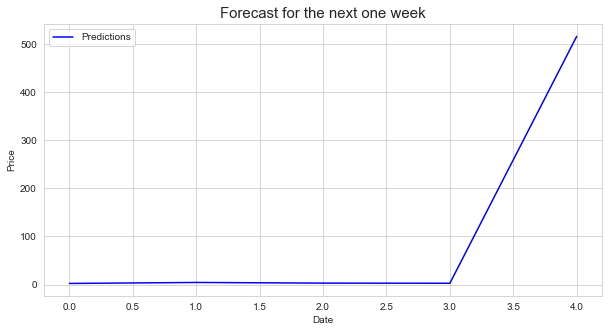

In [37]:
# One week Prediction

oneweek_df_pred = pd.read_csv("one-week-predictions.csv")
buy_price = min(oneweek_df_pred["Predictions"])
sell_price = max(oneweek_df_pred["Predictions"])
oneweek_buy = oneweek_df_pred.loc[oneweek_df_pred["Predictions"] == buy_price]
oneweek_sell = oneweek_df_pred.loc[oneweek_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneweek_buy,'\n')
print("Sell price and date")
print(oneweek_sell)
oneweek_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next one week",size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()